# Introduction to Neural Networks

Neural networks are a powerful machine learning framework used to learn complex input-output mappings from examples. Examples of successful applications of neural networks include:
1. Classification of handwritten digits
2. Speech recognition

Neural networks can be viewed as a series of nonlinear transformations applied to the input variables where the nature of the transformation is learned from the training data. There are several neural network architectures but we will focus on a feedforward architecture where information flows in one direction from input to output and there is no feedback from the output back to the input.

## The Multilayer Perceptron

The multilayer perceptron (MLP) is a feed forward neural network. The figure below shows an MLP with a single hidden layer (from http://deeplearning.net/tutorial/mlp.html).
![MLP](mlp.png)

In the following example, assume that there are $D$ inputs, $M$ hidden units and $K$ outputs.

The input to a given layer is obtained from the output of the previous layer. The output of a given layer is obtained by applying an activation function to a weighted linear combination of the inputs. 

Mathematically let $x_1,\ldots,x_D$ be the input variables. The input to each hidden neuron is formed by taking a linear combination of the inputs. That is 

\begin{eqnarray*}
a_j = \sum_{i=1}^Dw_{ji}^{(1)}x_i + w_{j0}^{(1)}
\end{eqnarray*}


The output of the $j$th hidden layer is given by
\begin{eqnarray*}
z_j=h(a_j)
\end{eqnarray*}
where:
1. $h(.)$ is a nonlinear activation function
2. $w_{ji}^{(1)}$ is the weight from input layer node (neuron) $i$ to hidden layer node $j$
3. $w_{j0}^{(1)}$ is known as the bias of hidden neuron $j$

Similarly, the output $y_k$ of the $k$th output neuron is obtained by applying an activation function to a weighted linear combination of the inputs from the hidden layer.

The activations for each of the hidden layer neurons is 
\begin{eqnarray*}
a_k = \sum_{j=1}^Mw_{kj}^{(2)}z_j + w_{k0}^{(2)}
\end{eqnarray*}

The output is computed from this activation depending on the problem at hand. 

1. For regression we have $y_k = a_k$
2. For binary classification we use the sigmoid function $y_k = \sigma(a_k)$
3. For multiclass problems we use the softmax function
\begin{eqnarray*}
y_k = \frac{e^{a_k}}{\sum_{n=1}^Ke^{a_n}}
\end{eqnarray*}
which is a probability distribution over the output categories

This output is a function of the weights $\mathbf{w}$ and the inputs $\mathbf{x}$ and we write $y_k(\mathbf{x},\mathbf{w})$. We can collect all the outputs into a vector $\mathbf{y}(\mathbf{x},\mathbf{w})$

For a neural network learning $K$ binary classification problems, we would compute the probability of membership of the $k$th class using
\begin{eqnarray*}
y_k(\mathbf{x},\mathbf{w}) = \sigma\Big(\sum_{j=1}^Mw_{kj}^{(2)}h\big(\sum_{i=1}^Dw_{ji}^{(1)}x_i + w_{j0}^{(1)}\big) + w_{k0}^{(2)}\Big)
\end{eqnarray*}


### Activation Functions
There are a number of activation functions used depending on the nature of the data and target variables. These include:
1. The sigmoid function 
\begin{eqnarray*}
\sigma(a)=\frac{1}{1+\exp(-a)}
\end{eqnarray*}
2. The Tanh function 
\begin{eqnarray*}
\tanh(a)=\frac{\exp(a)-\exp(-a)}{\exp(a)+\exp(-a)}
\end{eqnarray*}
3. The rectified linear unit (ReLU)
\begin{eqnarray*}
f(a)=max\{o,a\}
\end{eqnarray*}



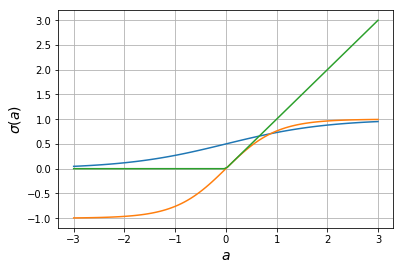

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def relu(a):
    result = np.copy(a)
    result[result < 0] = 0
    return result

    

%matplotlib inline
a = np.linspace(-3, 3, 100)
plt.plot(a, sigmoid(a))
plt.plot(a, np.tanh(a))
plt.plot(a, relu(a))
plt.grid(True)
plt.xlabel(r'$a$', fontsize=14);
plt.ylabel(r'$\sigma(a)$', fontsize=14);

### Network Learning

The aim of training the neural network is to learn an input-output mapping from examples. We aim to learn a set of weights and biases to obtain the appropriate mapping. Given $N$ training examples $\mathbf{x}_n$ and the correspinding target output vectors $\mathbf{t}_n$, we aim to learn weights and biases to minimize an appropriate error. In regression problems we may use the sum-of-square error.
\begin{eqnarray*}
E(\mathbf{w})=\frac{1}{2}\sum_{n=1}^N||\mathbf{y}(\mathbf{x}_n,\mathbf{w})-\mathbf{t}_n)||^2
\end{eqnarray*}

For binary classification we use the cross-entropy error which we encountered in logistic regression.

\begin{eqnarray*}
E(\mathbf{w}) = -\sum_{n=1}^N\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\}
\end{eqnarray*}



This learning is often achieved by gradient descent where the weights at one time step $\tau$ are modified in the direction of negative gradient according to 
\begin{eqnarray*}
\mathbf{w}^{(\tau+1)}=\mathbf{w}^{(\tau)}-\eta\nabla E(\mathbf{w}^{(\tau)})
\end{eqnarray*}
where $\eta>0$ is the learning rate. In practice, for the MLP the gradient of the error function is found by backpropagation.

